# Robust Varibad Analysis

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cross_entropy_sampler as cem
import general_utils as utils
import analysis

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)

## Configuration

In [2]:
ENV_NAME = 'KhazadDum-v0'
TITLE = ENV_NAME[:-3]
ENV_SHORT = 'kd'
TASKS = ('noise',)
METHODS = ('varibad', 'cembad', 'cvrbad')
SEEDS = list(range(30))
ALPHA = 0.01

CEM-related configuration:

In [3]:
TRANSFORMATION = lambda x: x
YLIM = None
SMOOTH = 10

## CEM analysis (sample seed)

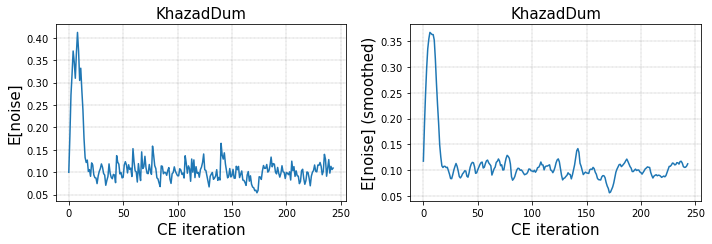

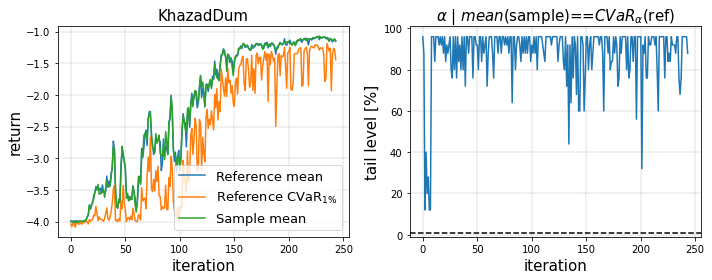

In [4]:
task_dim = len(TASKS)
ce, c1, c2, axs = analysis.cem_analysis(
    ENV_NAME, task_dim, TRANSFORMATION, YLIM, SMOOTH, title=TITLE, tasks=TASKS, seed=2)

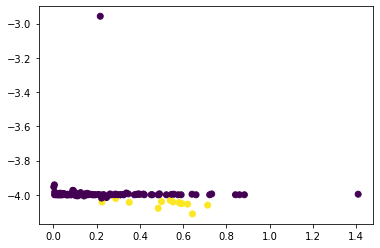

In [5]:
cc = c2[c2.batch==10]
plt.scatter(cc['sample'].values, cc.score.values, c=cc['selected'].values)

## Validation results

In [6]:
%%time
dd, dda, ddm, ddc, dd0, dda0, task_dim = analysis.load_train_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA)
dd

kd_varibad_0__10:12_13:16:33
kd_varibad_1__10:12_13:32:53
kd_varibad_2__10:12_13:50:07
kd_varibad_3__10:12_14:07:15
kd_varibad_4__10:12_14:24:31
kd_varibad_5__10:12_14:41:45
kd_varibad_6__10:12_14:58:59
kd_varibad_7__10:12_15:16:09
kd_varibad_8__10:12_15:33:29
kd_varibad_9__10:12_15:51:01
kd_varibad_10__10:12_16:08:30
kd_varibad_11__10:12_16:26:04
kd_varibad_12__10:12_16:43:31
kd_varibad_13__10:12_17:00:52
kd_varibad_14__10:12_17:18:06
kd_varibad_15__10:12_17:35:25
kd_varibad_16__10:12_17:52:40
kd_varibad_17__10:12_18:10:08
kd_varibad_18__10:12_18:27:25
kd_varibad_19__10:12_18:44:53
kd_varibad_20__10:12_04:09:43
kd_varibad_21__10:12_04:27:10
kd_varibad_22__10:12_04:44:58
kd_varibad_23__10:12_05:02:30
kd_varibad_24__10:12_05:20:24
kd_varibad_25__10:12_05:37:58
kd_varibad_26__10:12_05:55:51
kd_varibad_27__10:12_06:13:23
kd_varibad_28__10:12_06:31:14
kd_varibad_29__10:12_06:49:10
kd_cembad_0__10:12_13:16:33
kd_cembad_1__10:12_13:33:33
kd_cembad_2__10:12_13:50:49
kd_cembad_3__10:12_14:08:0

,iter,task_id,ep,ret,info,task0,method,seed
0,-1,0,0,-0.997139,stay_fall,0.069893,varibad,0
1,-1,0,1,-0.998174,stay_fall,0.069893,varibad,0
2,-1,0,2,0.071286,short_done,0.069893,varibad,0
3,-1,0,3,0.033643,short_done,0.069893,varibad,0
4,-1,1,0,0.056079,short_done,0.013272,varibad,0
...,...,...,...,...,...,...,...,...
921595,449,254,3,-0.368065,long_done,0.150312,cvrbad,29
921596,449,255,0,-0.303642,long_done,0.007203,cvrbad,29
921597,449,255,1,-1.000000,stay,0.007203,cvrbad,29
921598,449,255,2,-1.000000,stay,0.007203,cvrbad,29


CPU times: user 138 ms, sys: 24.1 ms, total: 162 ms
Wall time: 127 ms


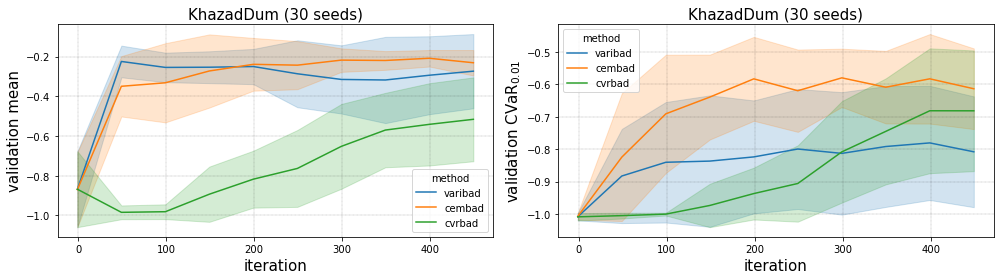

In [7]:
%%time
axs = analysis.show_validation_results_over_seeds(ddm, ddc, ALPHA, TITLE)

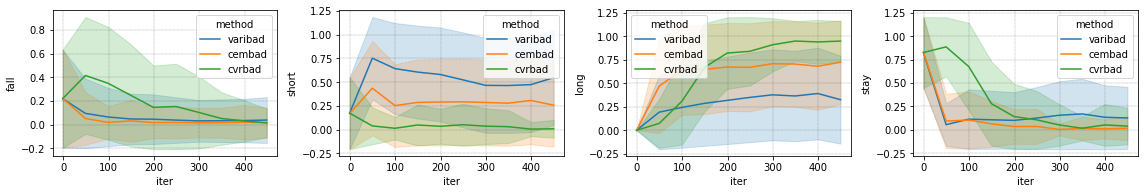

In [8]:
keys = ('fall', 'short', 'long', 'stay')
n = len(keys)
axs = utils.Axes(n, 4, axsize=(4,2.8), fontsize=15)
a = 0

for k in keys:
    dd[k] = [k in p for p in dd['info']]
    sns.lineplot(data=dd, x='iter', y=k, hue='method', ci='sd', ax=axs[a])
    a += 1
plt.tight_layout();

## Test results

In [9]:
def summary(model, save=None):
    rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
        ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, model)
    
    axs0 = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE)
    if save is not None: plt.savefig(f'outputs/{save}_boxplot', bbox_inches='tight')
    axs1 = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE, barplot=True)
    if save is not None: plt.savefig(f'outputs/{save}_barplot', bbox_inches='tight')
    
    axs2 = analysis.show_test_vs_tasks(rra, rra0, TITLE, TASKS)
    if save is not None: plt.savefig(f'outputs/{save}_tasks', bbox_inches='tight')
    
    axs3 = utils.Axes(3,3)
    sns.countplot(data=rr, x='info', hue='method', ax=axs3[0])
    axs3[0].set_xticklabels(axs3[0].get_xticklabels(), fontsize=12, rotation=20)
    utils.qplot(rra, 'ret', 'task', 'method', ax=axs3[1]);
    utils.qplot(rra, 'ret', 'task', 'method', ax=axs3[2], q=np.arange(0,0.1,0.001))
    plt.tight_layout()
    
    utils.qplot(rr, 'ret', 'task', 'info', utils.Axes(1,1,(6,4))[0]);
    print(rr.groupby('info').apply(lambda d: (len(d), d.ret.mean()) ))
    
    rr['model'] = [f'{m}_{s}' for m,s in zip(rr.method,rr.seed)]
    rr['episode'] = rr.ep.astype(str)
    rr['fall'] = ['fall' in p for p in rr['info']]
    rr['short'] = ['short' in p for p in rr['info']]
    rr['long'] = ['long' in p for p in rr['info']]
    rr['stay'] = ['stay' in p for p in rr['info']]

    axs4 = utils.Axes(4, 4)
    for a, y in enumerate(('long', 'short', 'fall', 'stay')):
        rr['y'] = 100*rr[y]
        sns.lineplot(data=rr, x='ep', y='y', hue='method', ax=axs4[a])
        axs4.labs(a, 'episode', f'{y} [%]', f'KhazadDum ({len(SEEDS)} seeds)')
    plt.tight_layout()
    
    for y in ('long', 'short', 'fall'):
        axs = utils.compare_quantiles(rr[rr.seed.isin(SEEDS[:4])], x='task0', y=y, hue='episode', fac='method', xbins=6, mean_digits=2, axs_args=dict(W=4,axsize=(5,3.5)))
        for a in range(len(axs)):
            axs[a].set_ylim((-0.02,0.2 if y=='fall' else 1.02))

    return rr

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
info
long            (42334, -0.7261703822184686)
long_done     (199244, -0.29091171014289124)
long_fall         (687, -0.9933080370422708)
short            (4117, -0.5464189145673326)
short_done    (87260, 0.0034472893290827915)
short_fall        (6354, -1.016784847111007)
stay            (22280, -0.9995145052270145)
stay_fall         (604, -0.9995353160709735)
dtype: object
CPU times: user 4min 14s, sys: 52.6 s, total: 5min 6s
Wall time: 3min 27s


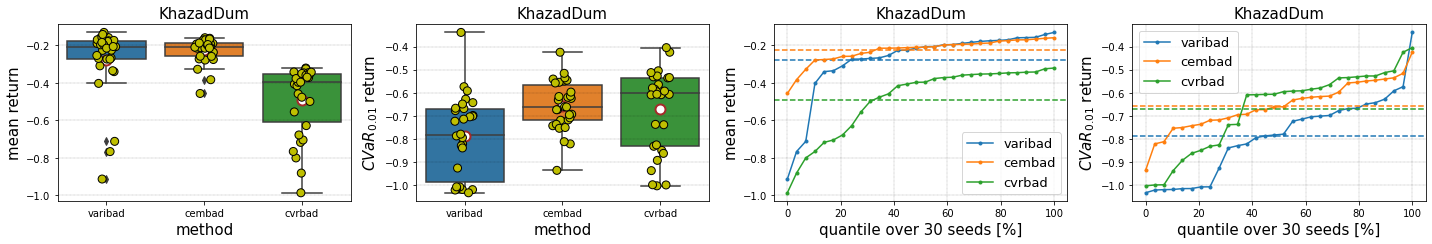

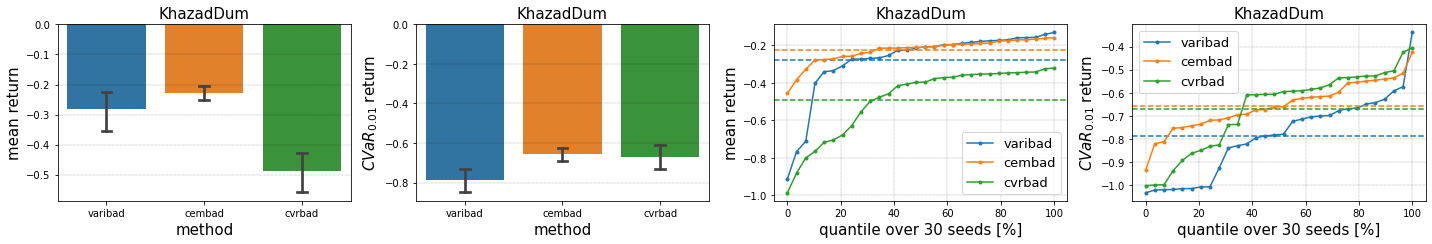

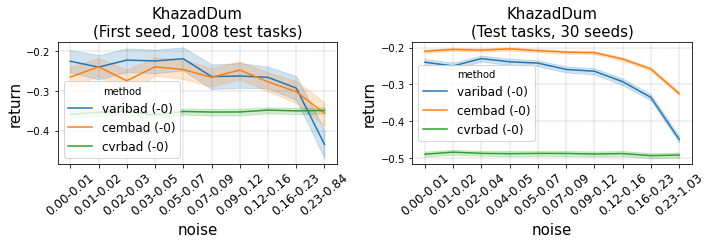

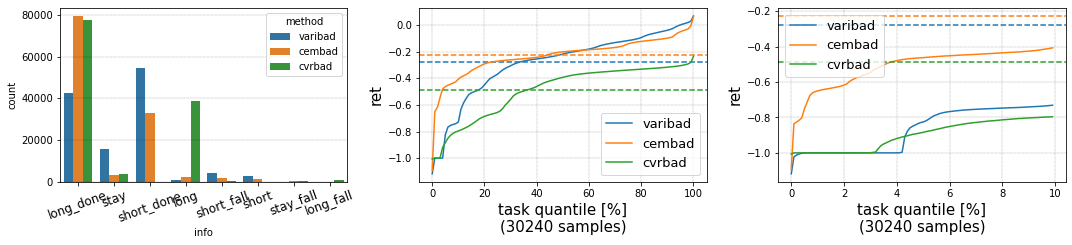

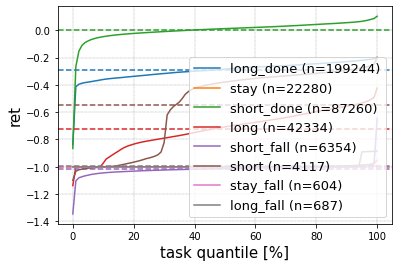

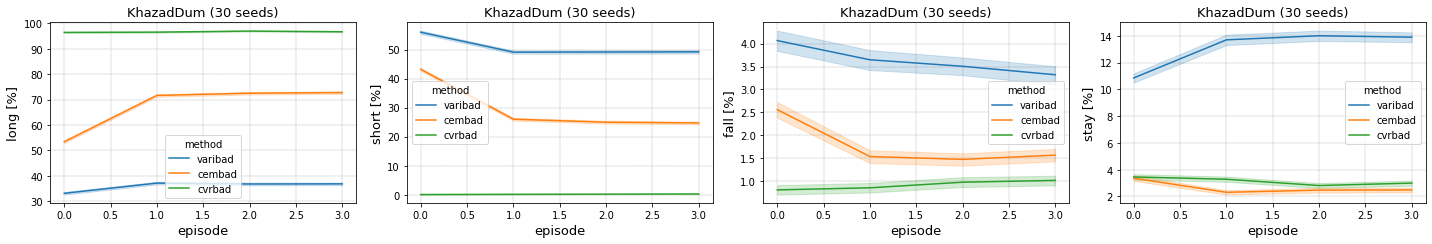

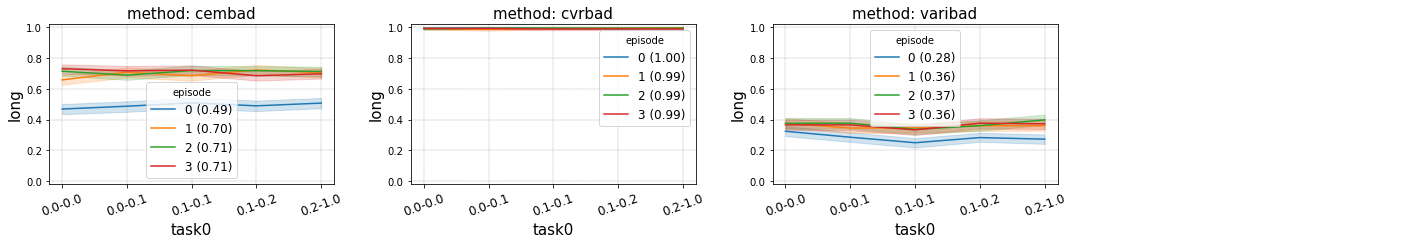

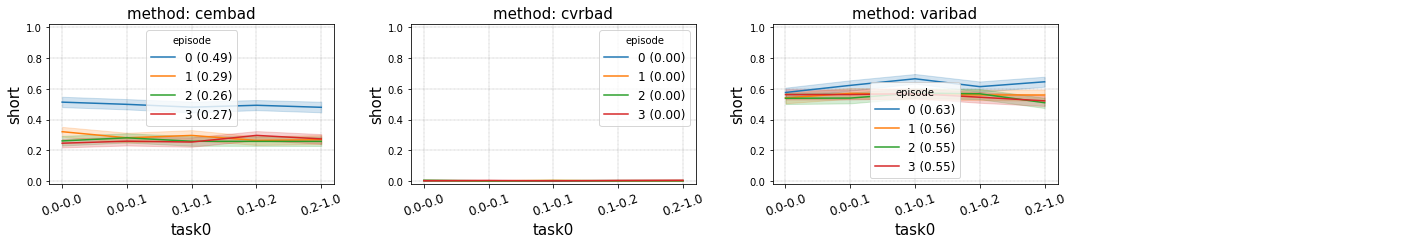

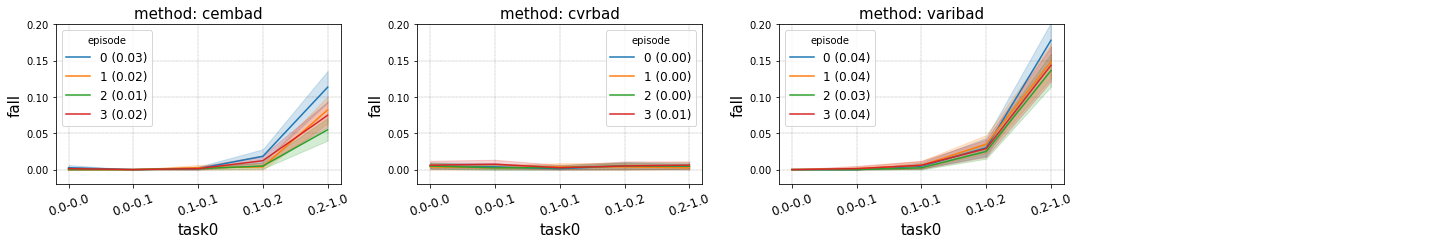

In [10]:
%%time
rr = summary('final')

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
info
long           (49158, -0.6870613715488745)
long_done     (206856, -0.2919135626498981)
long_fall        (204, -0.9331374825800166)
short           (978, -0.40923585058599404)
short_done    (29692, 0.013831658326726741)
short_fall      (2142, -1.0176219154083206)
stay           (69672, -0.9999816275774605)
stay_fall       (4178, -0.9999132846861493)
dtype: object
CPU times: user 4min 8s, sys: 52.9 s, total: 5min 1s
Wall time: 3min 23s


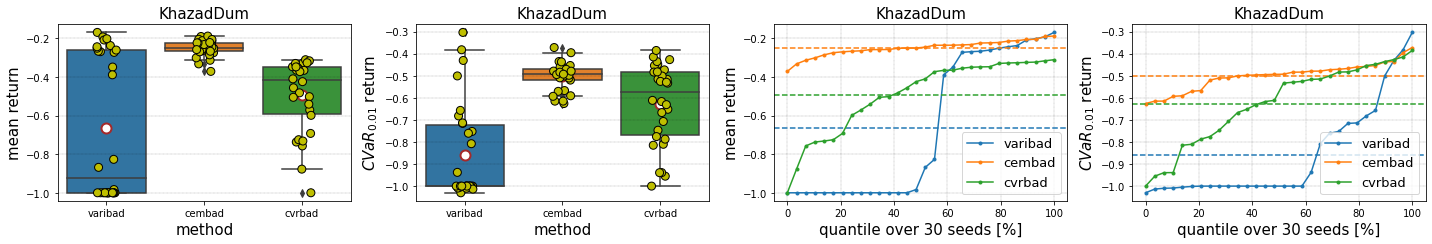

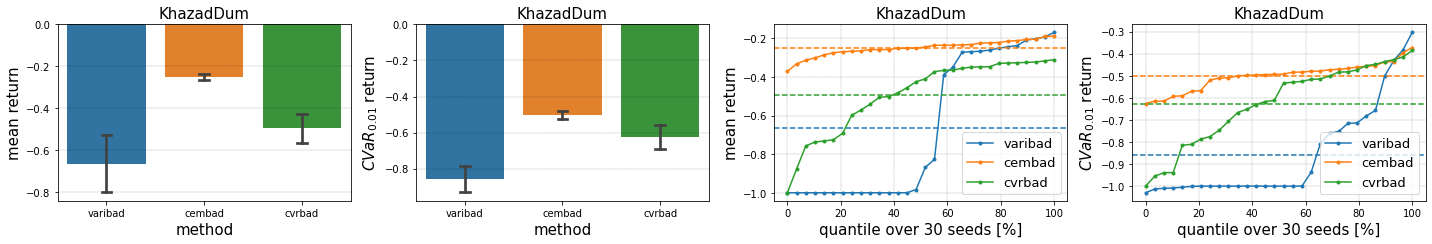

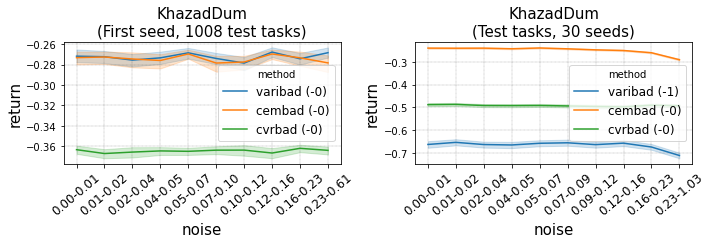

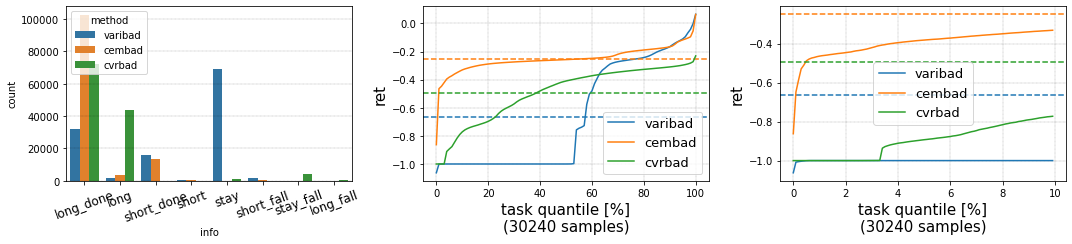

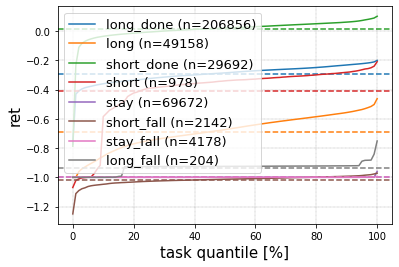

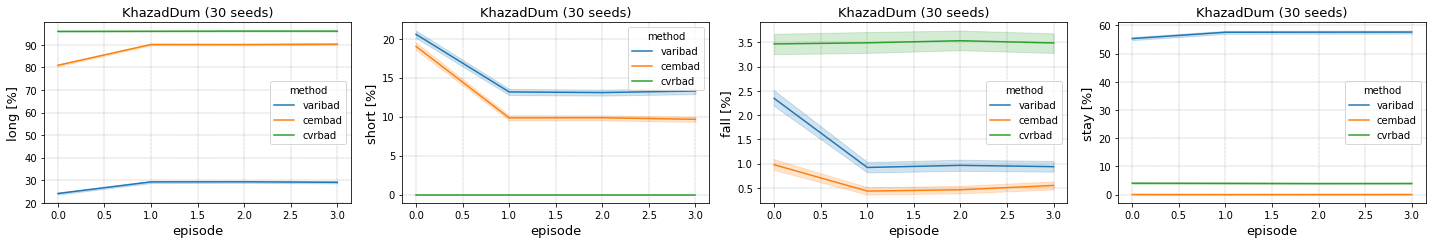

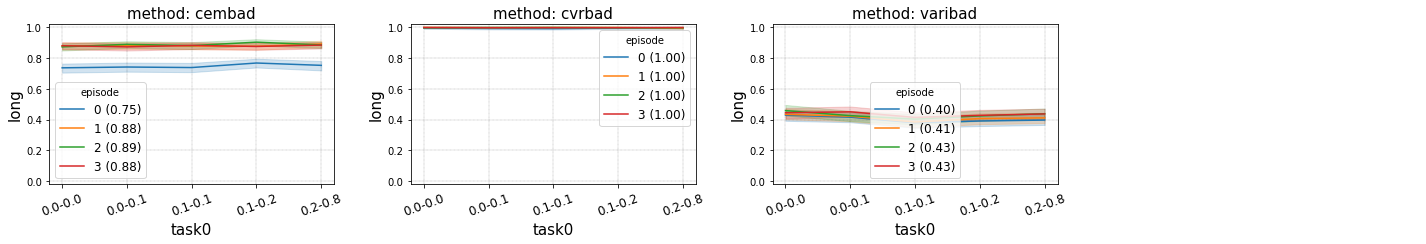

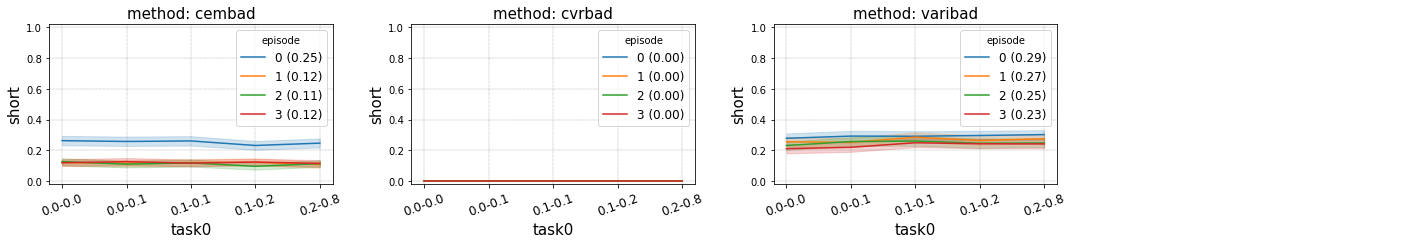

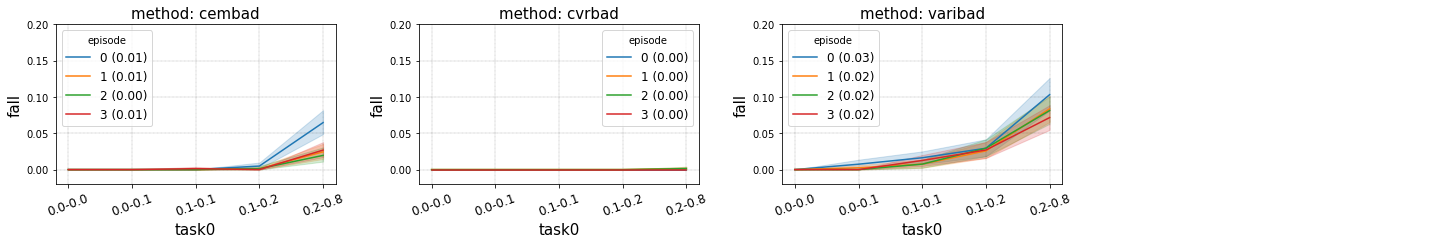

In [11]:
%%time
rr = summary('best_cvar')

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
info
long            (48143, -0.6872837028590727)
long_done     (204314, -0.29261693455057086)
long_fall         (204, -0.9331374825800166)
short            (1602, -0.3779323526870892)
short_done    (91945, 0.0060917232936575656)
short_fall       (8300, -1.0129805073321583)
stay             (3856, -0.9999038419411885)
stay_fall        (4516, -0.9997206221015397)
dtype: object
CPU times: user 4min 10s, sys: 53.8 s, total: 5min 4s
Wall time: 3min 25s


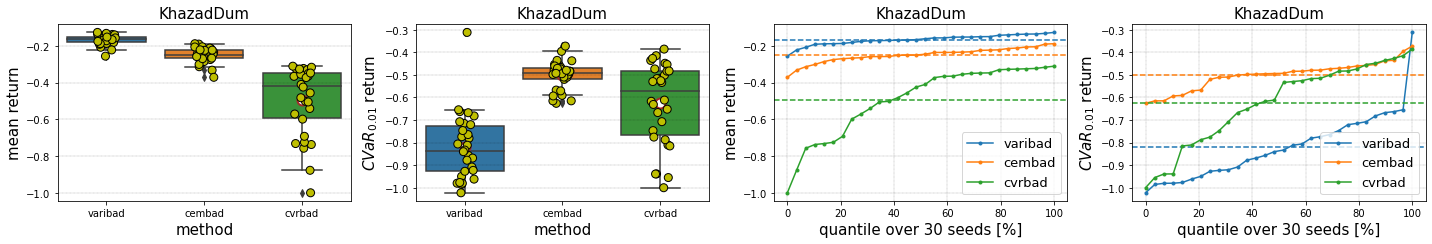

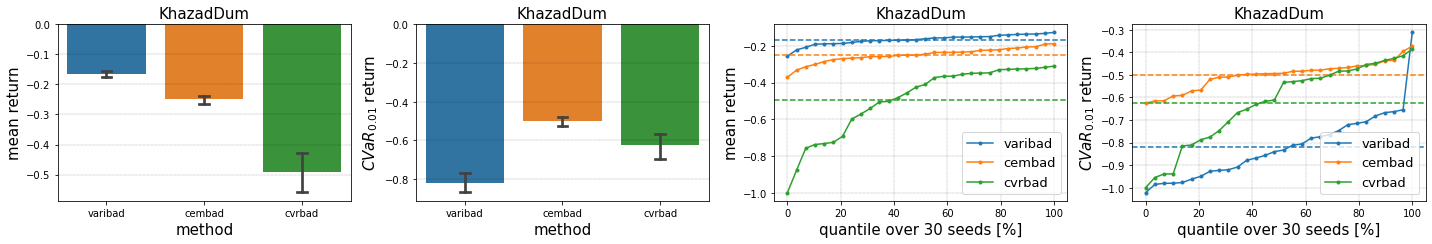

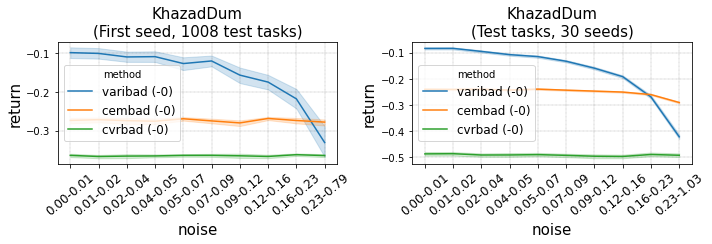

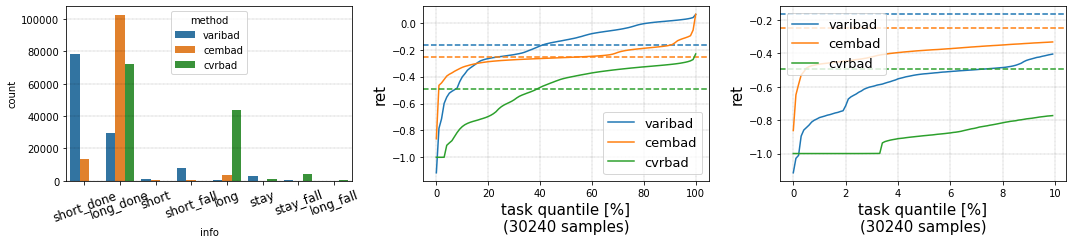

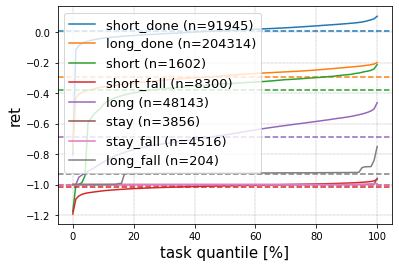

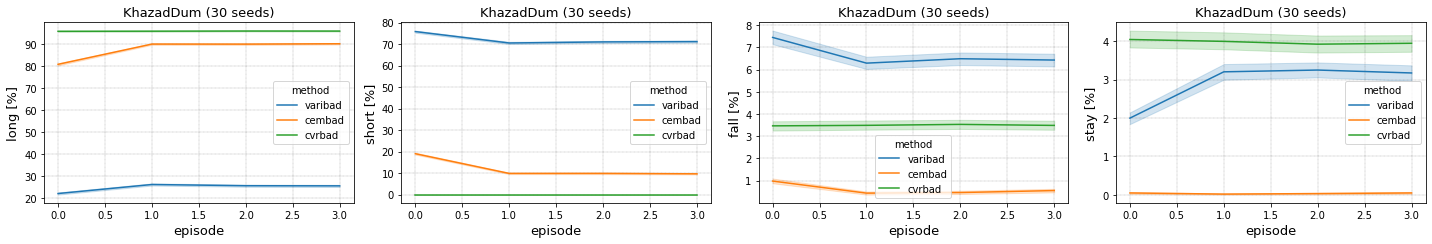

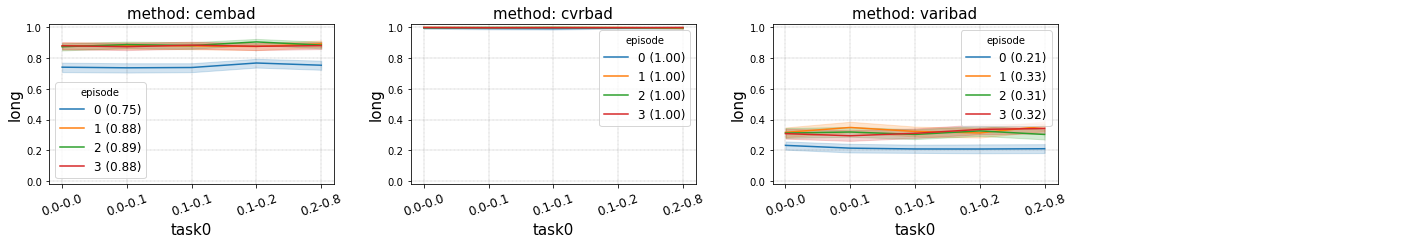

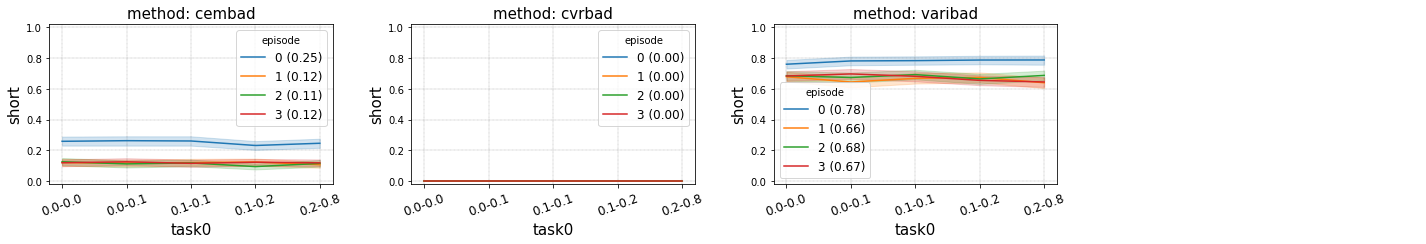

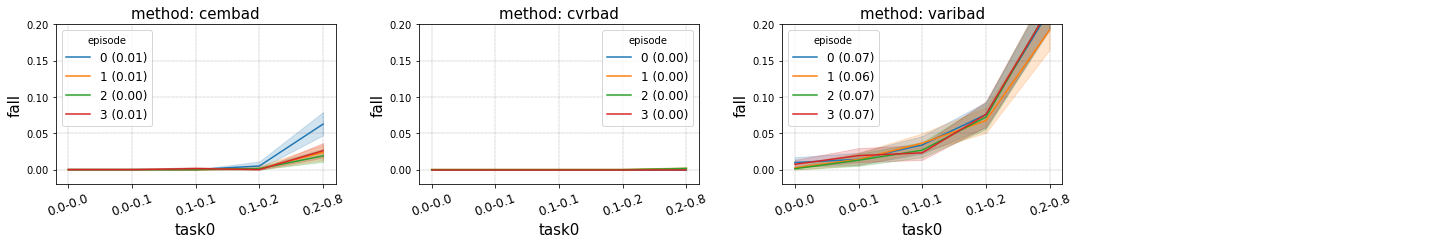

In [12]:
%%time
rr = summary(lambda nm: 'best_mean' if nm=='varibad' else 'best_cvar') #, save='kd')

In [13]:
# sns.countplot(data=rr[rr.method=='cembad'], x='info', hue='seed', ax=utils.Axes(1,1,(15,7))[0]);

### Nice figures

In [14]:
%%time
model = lambda nm: 'best_mean' if nm=='varibad' else 'best_cvar'
nm_map = dict(varibad='VariBAD', cvrbad='CVaR-ML', cembad='RoML')
save = 'kd'
rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, model, nm_map=nm_map)

Test tasks: 1008
CPU times: user 3min 51s, sys: 51.8 s, total: 4min 43s
Wall time: 3min 6s


Average return for tasks with various ranges of noise in KhazadDum: VariBAD has a large drop under high noise, whereas RoML is robust to the task.
Errors correspond to 0.95 confidence intervals over 30 seeds.

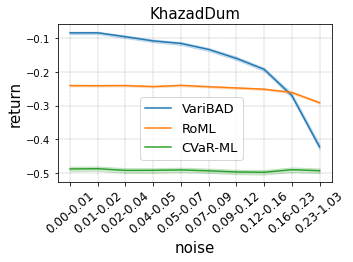

In [15]:
axs = utils.Axes(1,1, fontsize=15)
tit = TITLE  # f'{TITLE}\n(Test tasks, {len(pd.unique(rra.seed))} seeds)'

utils.compare_quantiles(rra, f'task0', 'ret', 'method', mean=None, mean_digits=2,
                        xbins=11, lab_rotation=40, axs=axs, a0=0)
axs.labs(0, TASKS[0], 'return', tit);
plt.legend(loc=(0.3,0.14), fontsize=13);
plt.savefig(f'outputs/{save}_tasks', bbox_inches='tight', dpi=300);

Mean and CVaR returns over 1000 test tasks in KhazadDum.
Errors correspond to 0.95 confidence intervals over 30 seeds.

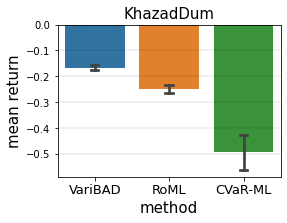

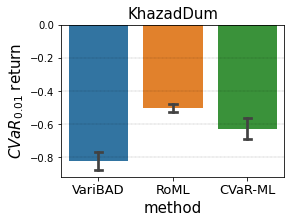

In [16]:
axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrm, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', 'mean return', TITLE)
plt.savefig(f'outputs/{save}_mean', bbox_inches='tight', dpi=300);

axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrc, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', f'$CVaR_{{{ALPHA}}}$ return', TITLE)
plt.savefig(f'outputs/{save}_cvar', bbox_inches='tight', dpi=300);

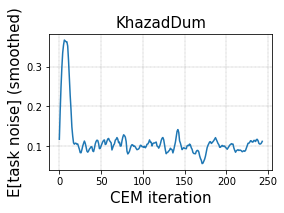

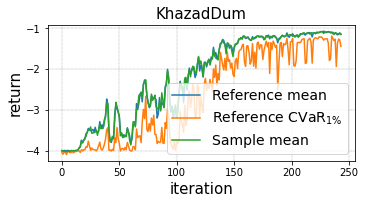

In [17]:
ce = cem.get_cem_sampler(ENV_NAME, seed=2, cem_type=1)
ce.load(f'logs/models/{ce.title}')
c1, c2 = ce.get_data()

axs = utils.Axes(1, 1, (4,2.5), fontsize=15)

tau = c1.iloc[:, -1].values
axs[0].plot(c1.batch, utils.smooth(tau, min(SMOOTH, len(c1))), label=TASKS[0])
axs.labs(0, 'CEM iteration', f'E[task {TASKS[0]}] (smoothed)', TITLE)
plt.savefig(f'outputs/{save}_noise', bbox_inches='tight', dpi=300);

##############

axs = utils.Axes(1, 1, (5.5,2.5), fontsize=15)
ce.show_sampled_scores(axs[0], 'return')
axs[0].set_title(TITLE, fontsize=15)
axs[0].legend(loc='lower right', fontsize=14)
plt.savefig(f'outputs/{save}_cem', bbox_inches='tight', dpi=300);